# Capstone Project - Average Rental Prices and Venues Analysis in São Paulo City
### Applied Data Science Capstone by IBM/Coursera
---

## Table of contents
* [Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)



# 1. Business Problem <a name="introduction"></a>

## 1.1. Background
São Paulo is the foremost industrial centre in Latin America. The city sits in a shallow basin with low mountains to the west. It lies about 220 miles (350 km) southwest of Rio de Janeiro and about 30 miles (50 km) inland from its Atlantic Ocean port of Santos. By the end of the 20th century, the city of São Paulo proper had a population of more than 10 million, and the metropolitan region had soared to about 19 million inhabitants. Area city, 576 square miles (1,493 square km)[1]. 

As a work force of this city, I decided to choose São Paulo in my project. The city is divided into many Boroughts, I selected the most famous districts, 74 in total. São Paulo has a high population density. Crowded cities tends to receive a lot of shops and social areas. When we think of it by the workforce point of view, we expect them to prefer the districts where there is a lower rental cost and, at the same time, they may want to choose the district according to the social places density (venues) and also prefer locations as close to the city center as possible. 

When considering all these variables, we can create a map and charts in order to find where the Rental index is placed and how each Borough is clustered according to the venue density.


This project uses some data science powers to generate a few most promissing boroughs based on these criterias above. Advantages of some areas will will be clearly expressed. Best possible final location can be chosen by workers!


## 1.2. Data <a name="data"></a>

Based on definition of the Business Problem, factors which will influence our decission are:

* Geospace locations and center coordinates of the each Borough from São Paulo were found in IBGE site. The .csv file has coordinates of all cities from Brazil. First, I cleaned the data and reducted it to data only from São Paulo city [2]; 
* Venues data were obtained from Foursquare API, to explore restaurants, hotels, stores, their type and location in every borough [3];
* It's challengeful to find public data related to demographic and social parameters for the city of São Paulo. Sometimes,you must set-up your own data tables in most cases. In this case, I collected latest House Rental Prices Averages for each Borough of São Paulo from housing retail web pages.
* It was considered a standard apartment for rental, as it follows: until 1-2 bedrooms, 1 garage, 70 m2. It was chosen because the main focus is in early professionals necessity.



# 2. Methodology <a name="methodology"></a>

## 2.1. Importing all fundamental libraries to begin the analysis

In [298]:
#Importing Libraries

# Data handling
import numpy as np 

# Data Analysis
import pandas as pd 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# JSON files
import json 

# Address converted in latitude and longitude
from geopy.geocoders import Nominatim 

#  JSON file converted to Pandas DataFrame
from pandas.io.json import json_normalize 

# Matplotlib and Plotting
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

# K-means from clustering step
from sklearn.cluster import KMeans

# Rendering Maps
import folium 

#Requests
import requests

print('All imported!')

All imported!


## 2.2. Loading dataframe: Pre-processing

GitHub was used as a repository in present study. The master data DF contains these main components Borough, Average Rental Apartment Prices, Latitude and Longitude informations of São Paulo in a CSV file.

In [299]:
df = pd.read_csv('Database.csv')
df.head()

,Borough,Avg_Rent,latitude,longitude
0,Cidade Antonio Estevao de Carvalho,110.294118,-23.535903,-46.473448
1,Itaim,92.027557,-23.470241,-46.396070
2,Itaim Bibi,87.090497,-23.585816,-46.682626
3,Jardins,74.229753,-23.573414,-46.672948
4,Alto do Pari,72.727273,-23.524611,-46.604187


In [300]:
print(df.shape)
df.describe()

(74, 4)


,Avg_Rent,latitude,longitude
count,74.000000,74.000000,74.000000
mean,42.372859,-23.482138,-46.736762
std,17.476344,0.334310,0.615419
min,15.873016,-23.702658,-51.102338
25%,30.164650,-23.585737,-46.696494
50%,38.228777,-23.549615,-46.656546
75%,52.602552,-23.523209,-46.611591
max,110.294118,-21.133105,-45.547962


## 2.3. Clustering São Paulo Boroughs and Setting the Maps
Geopy library was used to get the latitude and longitude values of São Paulo

In [301]:
#Exploring & Clustering Boroughs in São Paulo
#São Paulo Latitude and Longitude

address = 'Sao Paulo, BR'

#UserAgent: http request sent with request
geolocator = Nominatim(user_agent="carol_agent") 
location = geolocator.geocode(address)
latitude_sampa = location.latitude
longitude_sampa = location.longitude
print('Coordinates of São Paulo are {}, {}.'.format(latitude_sampa, longitude_sampa))

Coordinates of São Paulo are -23.5506507, -46.6333824.


## 2.4. Creating Sao Paulo Map
Using Folium to visualize geographic details of boroughs

In [302]:
# Creating a São Paulo Map
Sampa_map=folium.Map(location=[latitude_sampa, longitude_sampa], zoom_start=12)
#Sampa_map


In [303]:
# Adding Markers and Styling to the Map
for lat, lng, borough in zip(df['latitude'], df['longitude'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='pink',
        fill=True,
        fill_color='black',
        fill_opacity=0.7).add_to(Sampa_map)  
    
#Sampa_map

Foursquare API to explore the boroughs and cluster them.

In [304]:
#Foursquare API Connection
#ID
CLIENT_ID = 'GSRJY4CTWD1XFQHOIW5HBHXFJ3DUQ3EJ04NZIL3XWQ22WC35'
#PWR
CLIENT_SECRET = 'K3OEMSUMOA1XY4X303JDOM3G2JFCCHKRDAMMMABIEUJGNON1'
VERSION = '20200614'

print('Credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Credentials:
CLIENT_ID: GSRJY4CTWD1XFQHOIW5HBHXFJ3DUQ3EJ04NZIL3XWQ22WC35
CLIENT_SECRET:K3OEMSUMOA1XY4X303JDOM3G2JFCCHKRDAMMMABIEUJGNON1


## 2.5. Getting Latitude and Longitude from Borough in São Paulo City

In [305]:
# neighborhood latitude value
borough_latitude = df.loc[0, 'latitude'] 
# neighborhood longitude value
borough_longitude = df.loc[0, 'longitude'] 
# neighborhood name
borough_name = df.loc[0, 'Borough'] 

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, borough_latitude, borough_longitude))
                                                           

Latitude and longitude values of Cidade Antonio Estevao de Carvalho are -23.535903100000002, -46.4734484.


GET request URL: the limit was set as 100 venue and the radius 750 meter for each borough

In [306]:
LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=GSRJY4CTWD1XFQHOIW5HBHXFJ3DUQ3EJ04NZIL3XWQ22WC35&client_secret=K3OEMSUMOA1XY4X303JDOM3G2JFCCHKRDAMMMABIEUJGNON1&v=20200614&ll=-23.535903100000002,-46.4734484&radius=750&limit=100'

In [307]:
results = requests.get(url).json()


I consulted the get_category_type function from the Foursquare lab:

In [308]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## 2.6. Json Cleaning and Pandas dataframe Creation

In [309]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

55 venues were returned by Foursquare.


## 2.7. Exploring Boroughs
Function creation: list all the boroughs in São Paulo

In [310]:
#NEARBY

def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Running the function for each borough and creating a new dataframe: Sampa_venues

In [311]:
Sampa_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

Cidade Antonio Estevao de Carvalho
Itaim
Itaim Bibi
Jardins
Alto do Pari
Paraiso
Pinheiros
Brooklin
Ibirapuera
Higienopolis
Bela Vista
Granja Julieta
Alto da Boa Vista
Indianopolis
Consolacao
Campo Belo
Se
Cerqueira Cesar
Centro
Jardim Aeroporto
Sumarezinho
Real Parque
Jardim Analia Franco
Sumare
Perdizes
Pacaembu
Planalto Paulista
Varzea da Barra Funda
Lapa
Alto da Lapa
Barra Funda
Aclimacao
Morumbi
Campos Eliseos
Saude
Agua Branca
Sacoma
Mirandopolis
Quarta Parada
Ipiranga
Belem
Alto de Pinheiros
Vila Formosa
Bom Retiro
Bras
Jaguare
Cambuci
Cupece
Tremembe
Belenzinho
Tatuape
Mooca
Casa Verde
Catumbi
Piqueri
Cursino
Guaiauna
Interlagos
Jabaquara
Butanta
Socorro
Veleiros
Agua Funda
Tucuruvi
Bosque da Saude
Agua Rasa
Limao
Santana
Pirituba
Freguesia do O
Rio Pequeno
Mandaqui
Horto Florestal
Aricanduva


* Dataframe Size

In [312]:
print(Sampa_venues.shape)
Sampa_venues.head()

(2423, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cidade Antonio Estevao de Carvalho,-23.535903,-46.473448,O Mercado - Feira Gastronômica,-23.535661,-46.471097,Food Truck
1,Cidade Antonio Estevao de Carvalho,-23.535903,-46.473448,AUTO POSTO NOVO AGUIA DE HAIA,-23.538022,-46.476692,Gas Station
2,Cidade Antonio Estevao de Carvalho,-23.535903,-46.473448,SESI,-23.536492,-46.476807,Recreation Center
3,Cidade Antonio Estevao de Carvalho,-23.535903,-46.473448,Nosso Bar,-23.536657,-46.472670,Bar
4,Cidade Antonio Estevao de Carvalho,-23.535903,-46.473448,Habib's,-23.535371,-46.475450,Fast Food Restaurant


* Number of venues which returned for each borough:

In [313]:
#Grouping São Paulo Venues & Counting
Sampa_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Aclimacao,67,67,67,67,67,67
Agua Branca,14,14,14,14,14,14
Agua Funda,4,4,4,4,4,4
Agua Rasa,20,20,20,20,20,20
Alto da Boa Vista,44,44,44,44,44,44
Alto da Lapa,24,24,24,24,24,24
Alto de Pinheiros,14,14,14,14,14,14
Alto do Pari,17,17,17,17,17,17
Aricanduva,5,5,5,5,5,5


In [314]:
# Categories Quantity
print('There are {} uniques categories.'.format(len(Sampa_venues['Venue Category'].unique())))

There are 260 uniques categories.


In [315]:
#Creating a Table
summary = Sampa_venues.groupby('Borough').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

,Borough,Count
0,Agua Funda,4
1,Horto Florestal,4
2,Aricanduva,5
3,Pirituba,6
4,Itaim,6


## 2.8. Plotting a Graph for Summanry 
Bar chart creation and analysis

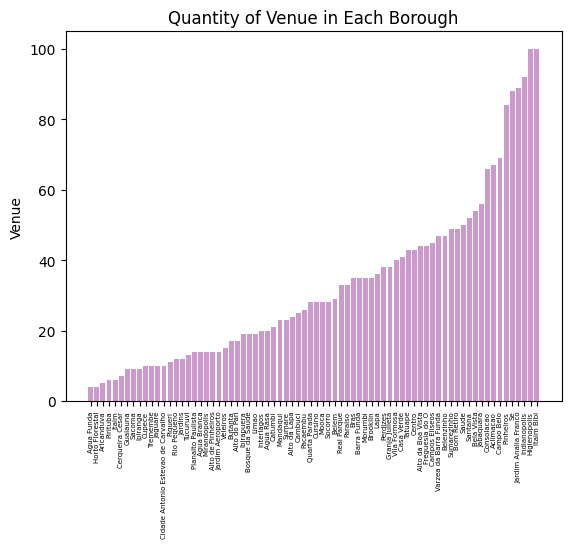

In [316]:
objects = summary.Borough
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, color='purple', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Quantity of Venue in Each Borough')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=5)

plt.show()


### Itaim and Higienópolis reached the 100 limit of venues. 

Agua Funda, Horto Florestal, Aricanduva,Pirituba, Itaim, Cerqueira Cesar, Gualauma, Sacoma, Ipiranga, Cupece, Tremebe, Jaguaré, Cidade Antonio, Piqueri, Rio Pequeno, Jardins, Tucuruvi, Planalto Paulista, Agua Branca, Mirandopolis, Alto do Ipiranga, Jardim do Aeroporto, Veleiros, Butantan, Alto do Pari are below 20 venues according to their coordinates(Latitude and Longitude).

It was runned just a single Latitude and Longitude pair for each borough, so it's necessary to include more possibilities with Neighborhood informations with more Latitude and Longitude informations.

* Unique categories for all the returned venues:

In [317]:
print('There are {} uniques categories.'.format(len(Sampa_venues['Venue Category'].unique())))

There are 260 uniques categories.


## 2.9. Borough Analysis
* Venues information

In [318]:
# One-hot-encoding: transform Venue Category variables in binary variables
sampa_ohe = pd.get_dummies(Sampa_venues[['Venue Category']], prefix="", prefix_sep="")

sampa_ohe['Borough'] = Sampa_venues['Borough'] 
sampa_ohe.drop(['Borough'],axis=1,inplace=True) 
sampa_ohe.insert(loc=0, column='Borough', value=Sampa_venues['Borough'] )

sampa_ohe.head()

,Borough,Acai House,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Baiano Restaurant,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Borek Place,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Campground,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,College Gym,College Theater,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cultural Center,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Dive Bar,Dive Shop,Dog Run,Donburi Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mineiro Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nightclub,Northeastern Brazilian Restaurant,Northern Brazilian Restaurant,Office,Optical Shop,Organic Grocery,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Pastelaria,Pastry Shop,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Ramen Restaurant,Recording Studio,Recreation Center,Rest Area,Restaurant,Road,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Southeastern Brazilian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tapiocaria,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Travel Agency,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Cidade Antonio Estevao de Carvalho,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [319]:
#Shaping One Hot Encoding from Venue Category
sampa_ohe.shape

(2423, 261)

In [320]:
#Grouping According to Neighbourhood
sampa_group = sampa_ohe.groupby('Borough').mean().reset_index()
sampa_group.head()

,Borough,Acai House,Accessories Store,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Baiano Restaurant,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Borek Place,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Campground,Candy Store,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Churrascaria,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,College Gym,College Theater,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cultural Center,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Dive Bar,Dive Shop,Dog Run,Donburi Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mineiro Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nightclub,Northeastern Brazilian Restaurant,Northern Brazilian Restaurant,Office,Optical Shop,Organic Grocery,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Pastelaria,Pastry Shop,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pizza Place,Plaza,Poke Place,Pool,Pool Hall,Portuguese Restaurant,Pub,Public Art,Racetrack,Ramen Restaurant,Recording Studio,Recreation Center,Rest Area,Restaurant,Road,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Southeastern Brazilian Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Tailor Shop,Tapas Restaurant,Tapiocaria,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Travel Agency,Turkish Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,Aclimacao,0.014925,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.074627,0.000000,0.029851,0.0,0.0,0.0,0.0,0.0,0.0,0.014925,0.0,0.014925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.029851,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.059701,0.000000,0.000000,0.0,0.029851,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.

In [321]:
#Shaping DataFrame Grouped by Neighbourhood after One Hot Encoding thorough Venue Category
sampa_group.shape

(74, 261)

Writing a function to sort the venues in descending order, to put it in a pandas dataframe

In [322]:
#Returning Most Commom Venues according to each row (Neighbourhood)
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

* Top 10 Most Common Venues in Boroughs

In [323]:
# Defining Variables to Return Commom Venues
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Populating DataFrame
bor_venues_sorted = pd.DataFrame(columns=columns)
bor_venues_sorted['Borough'] = sampa_group['Borough']

for ind in np.arange(sampa_group.shape[0]):
   bor_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sampa_group.iloc[ind, :], num_top_venues)

bor_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aclimacao,Pizza Place,Bakery,Korean Restaurant,Pharmacy,Chinese Restaurant,Dessert Shop,Supermarket,Health Food Store,Gym / Fitness Center,Burger Joint
1,Agua Branca,Café,Bar,Brazilian Restaurant,Art Museum,Gym,Gym / Fitness Center,Churrascaria,Bakery,Soccer Field,Fast Food Restaurant
2,Agua Funda,Bakery,Wine Shop,Furniture / Home Store,Zoo Exhibit,Event Space,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Falafel Restaurant
3,Agua Rasa,Farmers Market,Brazilian Restaurant,Pharmacy,Bakery,Diner,Brewery,Steakhouse,Burger Joint,Sushi Restaurant,Market
4,Alto da Boa Vista,Pharmacy,Bakery,Restaurant,Brazilian Restaurant,Food Truck,Pizza Place,Coffee Shop,Soccer Field,Furniture / Home Store,Convenience Store


## 2.10. Borough Clustering Process

Cluster method used: K-Means algorithm ( a kind of unsupervised learning). 

* Running K-Means to cluster the boroughs into 3 clusters.
* the number 3 was chosen because of elbow method (3 degree for optimum k - function is stabilized in k=3)

In [324]:
#Number of clusters
clusters = 3
sampa_group_cluster = sampa_group.drop('Borough', 1)
#Running K-Means Clustering process
kmeans = KMeans(n_clusters=clusters, random_state=1).fit(sampa_group_cluster)
#Check
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[1 1 0 1 1 1 1 1 1 1]
74


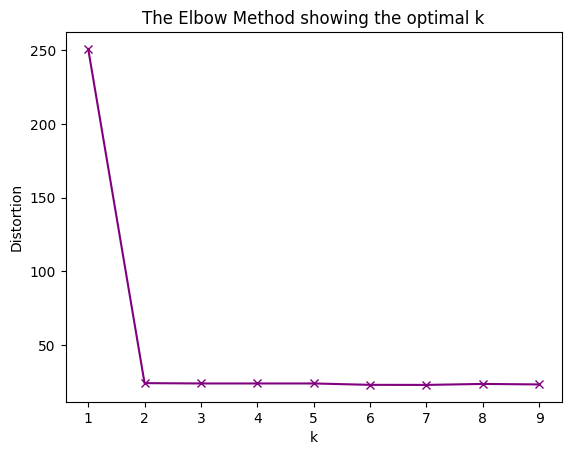

In [351]:
#Applying Elbow Method - K value Feasibility
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(sampa_group_cluster)
    distortions.append(sum(np.min(cdist(sampa_group_cluster, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / sampa_group_cluster.shape[0])

# Ploting 
plt.plot(K, distortions, 'bx-', color='purple')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##  2.11. Merging: Cluster + top 10 venues for each Borough

In [326]:
# Adding Cluster Labels column
bor_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#Merging Tables to add latitude/longitude for each Borough
sampa_merged = df
df=df.join(bor_venues_sorted.set_index('Borough'), on='Borough')

df.head()
#bor_venues_sorted.head()
#bor_venues_sorted.to_csv('neigh.csv',index=False)

,Borough,Avg_Rent,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cidade Antonio Estevao de Carvalho,110.294118,-23.535903,-46.473448,1,Deli / Bodega,Steakhouse,Toy / Game Store,Gas Station,Diner,Japanese Restaurant,Bar,Recreation Center,Food Truck,Fast Food Restaurant
1,Itaim,92.027557,-23.470241,-46.396070,1,Restaurant,Brazilian Restaurant,Food Truck,Rest Area,Gas Station,Zoo Exhibit,Escape Room,Drugstore,Dumpling Restaurant,Electronics Store
2,Itaim Bibi,87.090497,-23.585816,-46.682626,1,Japanese Restaurant,Restaurant,Hotel,Italian Restaurant,Brazilian Restaurant,French Restaurant,Coffee Shop,Burger Joint,Sushi Restaurant,Sandwich Place
3,Jardins,74.229753,-23.573414,-46.672948,1,Art Museum,Motorcycle Shop,Restaurant,Theater,Plaza,Optical Shop,General Entertainment,Indie Movie Theater,Athletics & Sports,Escape Room
4,Alto do Pari,72.727273,-23.524611,-46.604187,1,Churrascaria,Big Box Store,Cosmetics Shop,Lingerie Store,Fast Food Restaurant,Bakery,Warehouse Store,Pharmacy,Japanese Restaurant,Gas Station


## 2.12. 1st Most Common Venue Analysis

In [327]:
count_venue = df
count_venue = count_venue.drop(['Borough','Avg_Rent', 'latitude', 'longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Art Museum,Bakery,Bar,Bookstore,Brazilian Restaurant,Burger Joint,Café,Chinese Restaurant,Churrascaria,Convenience Store,Deli / Bodega,Farmers Market,Food Truck,Grocery Store,Gym / Fitness Center,Hotel,Italian Restaurant,Japanese Restaurant,Nightclub,Pharmacy,Pizza Place,Plaza,Pool,Racetrack,Restaurant,Science Museum,Shoe Store,Snack Place,Soccer Field,Soccer Stadium,Spa,Tea Room
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,9,4,1,7,1,3,1,1,3,1,1,0,1,2,1,2,1,1,4,8,3,1,1,7,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Clusters')

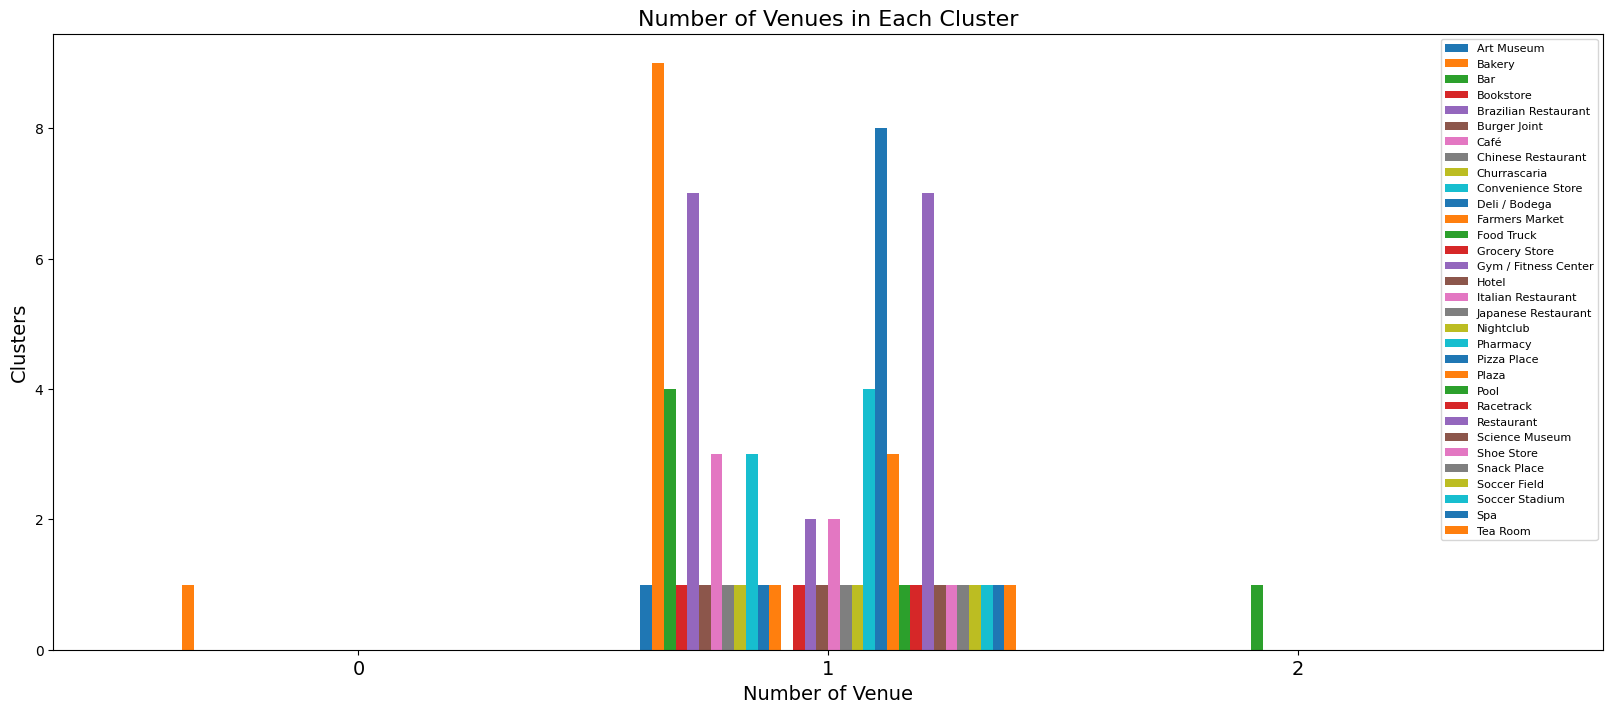

In [328]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 8)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

* A bar chart can show the 1st most common venue in each group/cluster created. Now it's possible to understand what category can represent each cluster, what aspect grouped all common venues.

In [348]:
df.loc[df['Cluster Labels'] == 1, df.columns[[0] + list(range(5, df.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cidade Antonio Estevao de Carvalho,Deli / Bodega,Steakhouse,Toy / Game Store,Gas Station,Diner,Japanese Restaurant,Bar,Recreation Center,Food Truck,Fast Food Restaurant
1,Itaim,Restaurant,Brazilian Restaurant,Food Truck,Rest Area,Gas Station,Zoo Exhibit,Escape Room,Drugstore,Dumpling Restaurant,Electronics Store
2,Itaim Bibi,Japanese Restaurant,Restaurant,Hotel,Italian Restaurant,Brazilian Restaurant,French Restaurant,Coffee Shop,Burger Joint,Sushi Restaurant,Sandwich Place
3,Jardins,Art Museum,Motorcycle Shop,Restaurant,Theater,Plaza,Optical Shop,General Entertainment,Indie Movie Theater,Athletics & Sports,Escape Room
4,Alto do Pari,Churrascaria,Big Box Store,Cosmetics Shop,Lingerie Store,Fast Food Restaurant,Bakery,Warehouse Store,Pharmacy,Japanese Restaurant,Gas Station
5,Paraiso,Café,Japanese Restaurant,Pizza Place,Brazilian Restaurant,Middle Eastern Restaurant,Spa,Ramen Restaurant,Gym / Fitness Center,Dive Shop,Chinese Restaurant
6,Pinheiros,Italian Restaurant,Vegetarian / Vegan Restaurant,Restaurant,Bar,Pet Store,Middle Eastern Restaurant,Pie Shop,Brazilian Restaurant,Café,Dance Studio
7,Brooklin,Pharmacy,Pizza Place,Farmers Market,Fruit & Vegetable Store,Bakery,Buffet,Chinese Restaurant,Restaurant,Dive Bar,Candy Store
8,Ibirapuera,Plaza,Restaurant,Hotel Bar,Spa,Boat or Ferry,Pharmacy,Park,Sandwich Place,Café,Shop & Service
9,Higienopolis,Italian Restaurant,Bakery,Dessert Shop,Bar,French Restaurant,Sushi Restaurant,Coffee Shop,Clothing Store,Brazilian Restaurant,Restaurant


Cluster Labeling:

* Cluster 0 : "Bakery and Social Places"
* Cluster 1 : "Social Intense Venues"
* Cluster 2 : "Food Truck & Parks" 

We can now assign those new labels to existing label of clusters:

In [369]:
Cluster_labels = {'Clusters': [0,1,2], 'Labels': ["Bakery and Social Places","Social Intense Venues","Food Truck & Parks"]}
Cluster_labels = pd.DataFrame(data=Cluster_labels)
Cluster_labels

,Clusters,Labels
0,0,Bakery and Social Places
1,1,Social Intense Venues
2,2,Food Truck & Parks


## 2.13. Rental Prices

In [370]:
data_process = df.sort_values('Avg_Rent').reset_index(drop=True)
data_process = df.drop(['latitude', 'longitude','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue',	'4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue' ], axis=1)
data_process.head()

,Borough,Avg_Rent,Cluster Labels
0,Cidade Antonio Estevao de Carvalho,110.294118,1
1,Itaim,92.027557,1
2,Itaim Bibi,87.090497,1
3,Jardins,74.229753,1
4,Alto do Pari,72.727273,1


* Frequency of apartments rental prices in different ranges:

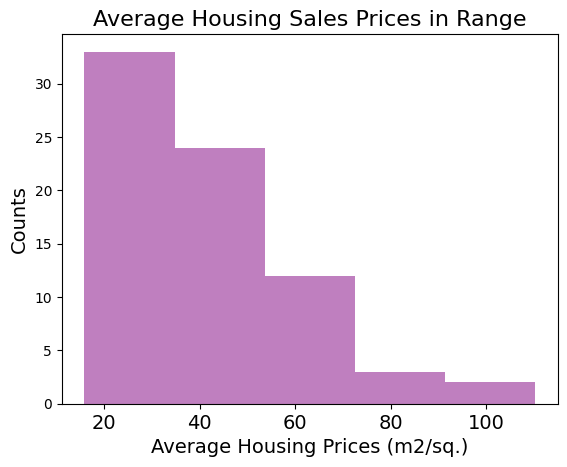

In [371]:
num_bins = 5
n, bins, patches = plt.hist(data_process['Avg_Rent'], num_bins, facecolor='purple', alpha=0.5)
plt.title("Average Housing Sales Prices in Range",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Average Housing Prices (m2/sq.)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

* Accoring to the graph, we can define the ranges as it follows:

In [372]:
level = []
for i in range(0,len(data_process)):
    if (data_process['Avg_Rent'][i] < 30):
        level.append("Low Rental Price")
    elif (data_process['Avg_Rent'][i] >= 30 and data_process['Avg_Rent'][i] < 50 ):
        level.append("Medium Rental Price")
    else:
        level.append("High Rental Price")   

data_process['Level_labels'] = level
data_process.head()

,Borough,Avg_Rent,Cluster Labels,Level_labels
0,Cidade Antonio Estevao de Carvalho,110.294118,1,High Rental Price
1,Itaim,92.027557,1,High Rental Price
2,Itaim Bibi,87.090497,1,High Rental Price
3,Jardins,74.229753,1,High Rental Price
4,Alto do Pari,72.727273,1,High Rental Price


## 2.14. Map: Grouping 3 venues information for each borough

In [373]:
top3 = Sampa_venues.groupby(['Borough','Venue Category']).size().reset_index(name='Counts')
top3 = top3.sort_values(['Borough','Counts'],ascending=False).groupby('Borough').head(3).reset_index(drop=True)

top3['Join'] = top3['Counts'].map(str) + " " + top3['Venue Category']
top3 = top3.groupby(['Borough'])['Join'].apply(", ".join).reset_index()

top3.head()

,Borough,Join
0,Aclimacao,"6 Pizza Place, 5 Bakery, 5 Korean Restaurant"
1,Agua Branca,"3 Bar, 3 Café, 1 Art Museum"
2,Agua Funda,"2 Bakery, 1 Furniture / Home Store, 1 Wine Shop"
3,Agua Rasa,"2 Bakery, 2 Brazilian Restaurant, 2 Farmers Ma..."
4,Alto da Boa Vista,"3 Bakery, 3 Brazilian Restaurant, 3 Food Truck"


In [374]:
result = pd.merge(df, 
                    top3[['Borough', 'Join']],
                    left_on = 'Borough',
                    right_on = 'Borough',
                    how = 'left')
result= pd.merge(result, 
                    Cluster_labels[['Clusters', 'Labels']],
                    left_on = 'Cluster Labels',
                    right_on = 'Clusters',
                    how = 'left')
result = pd.merge(result, 
                    data_process[['Borough', 'Level_labels']],
                    left_on = 'Borough',
                    right_on = 'Borough',
                    how = 'left')

result = result.drop(['Clusters'], axis=1)
result.head()

,Borough,Avg_Rent,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Join,Labels,Level_labels
0,Cidade Antonio Estevao de Carvalho,110.294118,-23.535903,-46.473448,1,Deli / Bodega,Steakhouse,Toy / Game Store,Gas Station,Diner,Japanese Restaurant,Bar,Recreation Center,Food Truck,Fast Food Restaurant,"1 Bar, 1 Deli / Bodega, 1 Diner",Social Intense Venues,High Rental Price
1,Itaim,92.027557,-23.470241,-46.396070,1,Restaurant,Brazilian Restaurant,Food Truck,Rest Area,Gas Station,Zoo Exhibit,Escape Room,Drugstore,Dumpling Restaurant,Electronics Store,"2 Restaurant, 1 Brazilian Restaurant, 1 Food T...",Social Intense Venues,High Rental Price
2,Itaim Bibi,87.090497,-23.585816,-46.682626,1,Japanese Restaurant,Restaurant,Hotel,Italian Restaurant,Brazilian Restaurant,French Restaurant,Coffee Shop,Burger Joint,Sushi Restaurant,Sandwich Place,"10 Japanese Restaurant, 9 Restaurant, 5 Brazil...",Social Intense Venues,High Rental Price
3,Jardins,74.229753,-23.573414,-46.672948,1,Art Museum,Motorcycle Shop,Restaurant,Theater,Plaza,Optical Shop,General Entertainment,Indie Movie Theater,Athletics & Sports,Escape Room,"3 Art Museum, 2 Motorcycle Shop, 1 Athletics &...",Social Intense Venues,High Rental Price
4,Alto do Pari,72.727273,-23.524611,-46.604187,1,Churrascaria,Big Box Store,Cosmetics Shop,Lingerie Store,Fast Food Restaurant,Bakery,Warehouse Store,Pharmacy,Japanese Restaurant,Gas Station,"6 Churrascaria, 1 Bakery, 1 Big Box Store",Social Intense Venues,High Rental Price


## 2.15. Cluster Venues Result: Map

In [379]:
clusters_map = folium.Map(location=[latitude_sampa, longitude_sampa], zoom_start=11)

x = np.arange(clusters)
ys = [i+x+(i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster, join  in zip(result['latitude'], result['longitude'], result['Borough'],kmeans.labels_,result['Join'] ):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) +str(join), parse_html=True)
    folium.CircleMarker([lat, lon], radius=7, popup=label, color=rainbow[cluster-1], fill=True, fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(clusters_map)
clusters_map

## 2.15. Rental Prices Result: Map
According to the above histogram about rental prices, it was defined the ranges as below:

In [383]:
#loop to find the houses on the map using coordinates
rental_map = folium.Map(location=[latitude_sampa, longitude_sampa], zoom_start=11)

#create a colour coding function
lower_price_bracket = np.percentile(df['Avg_Rent'],30)
mid_price_bracket = np.percentile(df['Avg_Rent'],50)

#Classify all ranges of rental prices
def colourcode(rent_price):
    if (rent_price < lower_price_bracket):
        return('green')
    elif (rent_price >= lower_price_bracket and rent_price < mid_price_bracket):
        return('orange')
    else:
        return('red')

#store latitude data and longitude data in dataframes
latitude = result['latitude']
longitude = result['longitude']
price = result['Avg_Rent']
address = result['Borough']
join = result['Join']

#loop to find the houses on the map using coordinates
for latitude, longitude, address, price, join in zip(latitude,longitude,address,price,join):
    folium.Marker(location = [latitude,longitude],popup=str(address) + ' $' + str(price) + str(join), icon = folium.Icon(color = colourcode(price))).add_to(rental_map)

rental_map


## References <a name="references"></a>

- 1 https://www.britannica.com/place/Sao-Paulo-Brazil
- 2 https://dados.gov.br/dataset/malha-geometrica-dos-municipios-brasileiros
- 3 https://foursquare.com/developers/apps